In [23]:
#import library

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
sns.set()

In [8]:
breast_cancer = load_breast_cancer()
x = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
x = x[['mean area', 'mean compactness']]
y= pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y= pd.get_dummies(y, drop_first= True)

In [9]:
print(breast_cancer.feature_names)
print(breast_cancer.data)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [10]:
print(y) #0 Malignant #1benign.


     benign
0     False
1     False
2     False
3     False
4     False
..      ...
564   False
565   False
566   False
567   False
568    True

[569 rows x 1 columns]


In [11]:
x_train, x_test, y_train, y_test =train_test_split(x,y, random_state =1)

In [12]:
knn = KNeighborsClassifier(n_neighbors=5, metric ='euclidean')
knn.fit(x_train, y_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [14]:
#so in this dataset, we want to determine patients who have cancer or not.
#Where bening = 0 (no cancer or zero risk)
#malignant = 1 (cancer shii)
#lets use a scatterplot to determine this


<Axes: xlabel='mean area', ylabel='mean compactness'>

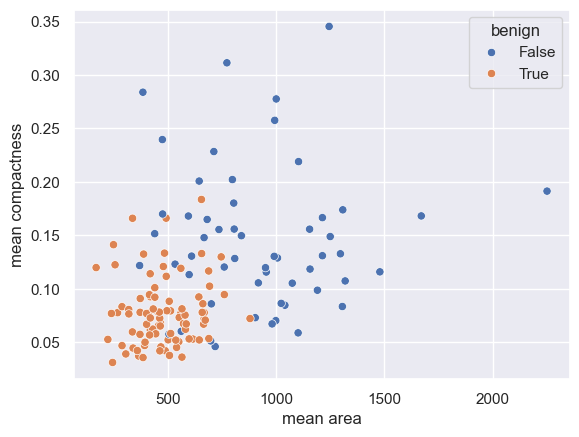

In [21]:
data = x_test.copy()
data['benign'] = y_test

sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=data,

)


In [18]:
y_pred = knn.predict(x_test)

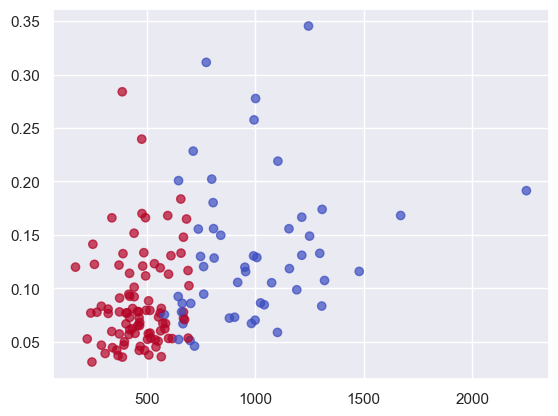

In [19]:
plt.scatter(
    x_test['mean area'],
    x_test['mean compactness'],
    c = y_pred,
    cmap = 'coolwarm',
    alpha = 0.7
)

In [25]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[42, 13],
       [ 9, 79]])

In [26]:
#42 = positive
#9 = false negative
#13 = false positive
#79 = negative

In [27]:
#Support Vector machine.

#the main objective of support vector machine algorithm is to find a hyperplane in a N dimensional space
#N is the number of features that distinctly classifies the data points.
#The line that seperates the data into two classes is called Support Vector classifier or Hard margin.
